<a href="https://colab.research.google.com/github/spsgim/Scaler_Projects/blob/main/Porter_Business_Case_SPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Introduction**

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.


##**Problem Statement**


Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an **estimated delivery time** that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.


##**Data Dictionary**

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

**market_id** : integer id for the market where the restaurant lies

**created_at** : the timestamp at which the order was placed

**actual_delivery_time** : the timestamp when the order was delivered

**store_primary_category** : category for the restaurant

**order_protocol** : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
total_items subtotal : final price of the order

**num_distinct_items** : the number of distinct items in the order

**min_item_price** : price of the cheapest item in the order

**max_item_price** : price of the costliest item in order

**total_onshift_partners** : number of delivery partners on duty at the time order was placed

**total_busy_partners** : number of delivery partners attending to other tasks

**total_outstanding_orders** : total number of orders to be fulfilled at the moment

##**1. Import the data and understand the structure of the data**

In [ ]:
##Import Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings as w
w.filterwarnings('ignore')

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#random forest model training
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
## Downloading DataSet
!gdown 1GZSyMAvu7s3htitW76dqm6z4tVpDlSEo

Downloading...
From: https://drive.google.com/uc?id=1GZSyMAvu7s3htitW76dqm6z4tVpDlSEo
To: /content/dataset.csv
100% 23.8M/23.8M [00:00<00:00, 26.9MB/s]


In [ ]:
##Load data
df = pd.read_csv('dataset.csv')
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
#Check the shape of data
df.shape

(197428, 14)

In [ ]:
##To List Column Names
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [ ]:
#check unque value count of features
df.nunique()

,0
market_id,6
created_at,180985
actual_delivery_time,178110
store_id,6743
store_primary_category,74
order_protocol,7
total_items,57
subtotal,8368
num_distinct_items,20
min_item_price,2312


In [ ]:
df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


##**2. Data preprocessing**

**1. Feature engineering:** Creating the target column time taken in each delivery from order timestamp (created_at) and delivery timestamp (actual_delivery_time)

In [ ]:
#convert column "created_at" and "actual_delivery_time" to pandas datetime
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df["created_at"]=pd.to_datetime(df["created_at"])

In [ ]:
#Create new feature "delivery_time" by substracting "created_at" from "actual_delivery_time"
df["delivery_time"] = df["actual_delivery_time"] - df["created_at"]

**2. Getting hour of day from the order time and also the day of the week**

In [ ]:
df["hour"] = df["created_at"].dt.hour
df["day"] = df["created_at"].dt.dayofweek


**3. Understanding pandas datetime data type and what function it provides by default**

In [ ]:
#Timedelta is the pandas equivalent of python’s datetime.timedelta and is interchangeable with it in most cases.
#1. Convert the df["actual_delivery_time"] series to pandas timedelta 2. Convert it to seconds 3. Divide by 60 to get the delivery time in minutes
df["delivery_time"] = pd.to_timedelta(df['delivery_time']).dt.total_seconds() / 60
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,hour,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20,3
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21,1
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2,6


##**3. Handling null values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

**Inference** : There are null/ missing values in dataset

In [ ]:
##Checking Duplicated values in dataset
df.duplicated().sum()

0

**Inference** : No duplicate records found

In [ ]:
#Dropping the columns which are not needed for model
df.drop(columns=["created_at","actual_delivery_time",'store_id'], inplace=True)

In [ ]:
##Find uniques values for each feature
df.nunique()

,0
market_id,6
store_primary_category,74
order_protocol,7
total_items,57
subtotal,8368
num_distinct_items,20
min_item_price,2312
max_item_price,2652
total_onshift_partners,172
total_busy_partners,159


In [ ]:
cat_cols = ["market_id", "order_protocol","store_primary_category","hour","day"]
for i in cat_cols:
  print(f"{i} : {df[i].unique()}")

market_id : [ 1.  2.  3.  4. nan  5.  6.]
order_protocol : [ 1.  2.  3.  4. nan  5.  6.  7.]
store_primary_category : ['american' 'mexican' nan 'indian' 'italian' 'sandwich' 'thai' 'cafe'
 'salad' 'pizza' 'chinese' 'singaporean' 'burger' 'breakfast'
 'mediterranean' 'japanese' 'greek' 'catering' 'filipino'
 'convenience-store' 'other' 'korean' 'vegan' 'asian' 'barbecue' 'fast'
 'dessert' 'smoothie' 'seafood' 'vietnamese' 'cajun' 'steak'
 'middle-eastern' 'soup' 'vegetarian' 'persian' 'nepalese' 'sushi'
 'latin-american' 'hawaiian' 'chocolate' 'burmese' 'british' 'pasta'
 'alcohol' 'dim-sum' 'peruvian' 'turkish' 'malaysian' 'ethiopian' 'afghan'
 'bubble-tea' 'german' 'french' 'caribbean' 'gluten-free' 'comfort-food'
 'gastropub' 'pakistani' 'moroccan' 'spanish' 'southern' 'tapas' 'russian'
 'brazilian' 'european' 'cheese' 'african' 'argentine' 'kosher' 'irish'
 'lebanese' 'belgian' 'indonesian' 'alcohol-plus-food']
hour : [22 21 20  2  3  0  1 19  4 23  5 18  6 17 16 15 14  7  8]
day : 

**Inferences** : store_primary_category and order_protocol are categorical columns

In [ ]:
#Check null values
df.isnull().sum()

,0
market_id,987
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0
total_onshift_partners,16262
total_busy_partners,16262


In [ ]:
print("Percentage of null values in the dataset")
df.isnull().sum()/df.shape[0] * 100

Percentage of null values in the dataset


,0
market_id,0.499929
store_primary_category,2.411006
order_protocol,0.503981
total_items,0.000000
subtotal,0.000000
num_distinct_items,0.000000
min_item_price,0.000000
max_item_price,0.000000
total_onshift_partners,8.236927
total_busy_partners,8.236927


In [ ]:
#dropping the 7 row in "delivery_time"
df.dropna(subset=["delivery_time"],inplace =True)

In [ ]:
#imputing mode of column in categorical columns
for i in cat_cols:
  a = df[i].mode()
  #print(a[0])
  df[i].fillna(a[0],inplace = True)

In [ ]:
#Check null values
df.isnull().sum()

,0
market_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0
total_onshift_partners,16262
total_busy_partners,16262


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 197421 non-null  float64
 1   store_primary_category    197421 non-null  object 
 2   order_protocol            197421 non-null  float64
 3   total_items               197421 non-null  int64  
 4   subtotal                  197421 non-null  int64  
 5   num_distinct_items        197421 non-null  int64  
 6   min_item_price            197421 non-null  int64  
 7   max_item_price            197421 non-null  int64  
 8   total_onshift_partners    181159 non-null  float64
 9   total_busy_partners       181159 non-null  float64
 10  total_outstanding_orders  181159 non-null  float64
 11  delivery_time             197421 non-null  float64
 12  hour                      197421 non-null  int32  
 13  day                       197421 non-null  int32 

##**4. Encoding categorical columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 197421 non-null  float64
 1   store_primary_category    197421 non-null  object 
 2   order_protocol            197421 non-null  float64
 3   total_items               197421 non-null  int64  
 4   subtotal                  197421 non-null  int64  
 5   num_distinct_items        197421 non-null  int64  
 6   min_item_price            197421 non-null  int64  
 7   max_item_price            197421 non-null  int64  
 8   total_onshift_partners    181159 non-null  float64
 9   total_busy_partners       181159 non-null  float64
 10  total_outstanding_orders  181159 non-null  float64
 11  delivery_time             197421 non-null  float64
 12  hour                      197421 non-null  int32  
 13  day                       197421 non-null  int32 

We observe that the column "**store_primary_category**" is categorical column which need to encoded for model. Since the length = 73, we will use target encoding and avoid using one hot encoding as this will increase the dimentionality


In [ ]:
# Calculate the mean of the 'Target' variable for each category
category_means = df.groupby('store_primary_category')['delivery_time'].mean().to_dict()

# Map the means back to the 'Category' column to perform target encoding
df['store_primary_category'] = df['store_primary_category'].map(category_means)

In [ ]:
# Group by 'market_id' and impute missing 'total_onshift_partners', 'total_busy_partners', and 'total_outstanding_orders' with the median of the group
df['total_onshift_partners'] = df.groupby('market_id')['total_onshift_partners'].transform(lambda x: x.fillna(x.median()))
df['total_busy_partners'] = df.groupby('market_id')['total_busy_partners'].transform(lambda x: x.fillna(x.median()))
df['total_outstanding_orders'] = df.groupby('market_id')['total_outstanding_orders'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.isna().sum()

,0
market_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0
total_onshift_partners,0
total_busy_partners,0


##**5. Data visualization and cleaning**

<Axes: >

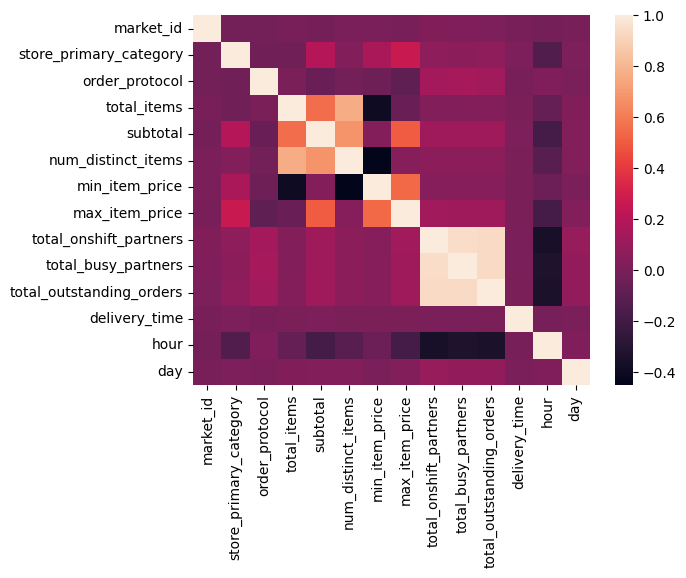

In [ ]:
sns.heatmap(df.corr())

**Inference :** We observe that delivery_time does not show correlation with other feature indicating the presence of non linear relationship

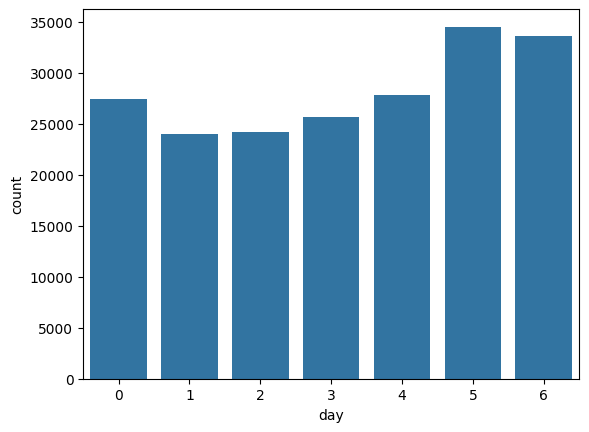

In [ ]:
sns.countplot(x=df.day)
plt.show()

**Inference :** The number of orders created are more during weekends.

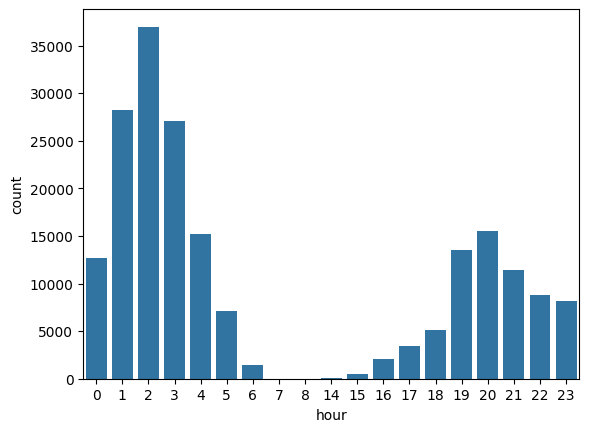

In [ ]:
sns.countplot(x=df.hour)
plt.show()

**Inference :** Number of delivery of orders increases as the week progresses. There is no delivery done between Between 6 AM and 2PM.

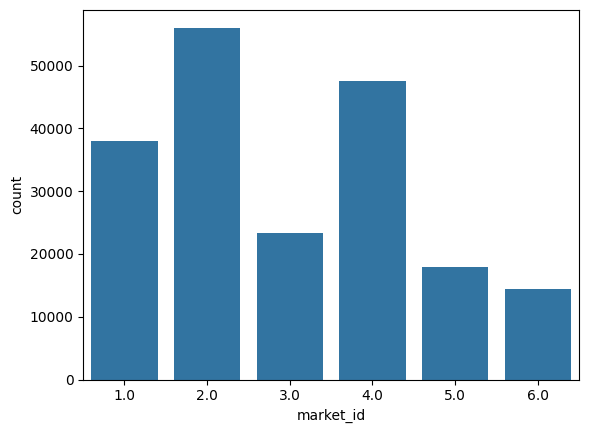

In [ ]:
sns.countplot(x=df.market_id)
plt.show()

**Inference :** The Number of order related to Market Id = 2.0 are highest while Market_id = 5.0 lowest

In [ ]:
df["delivery_time"].sort_values()

,delivery_time
63294,1.683333
862,3.716667
30562,4.950000
42507,5.350000
117928,5.416667
...,...
190860,907.450000
83055,950.533333
27189,5541.366667
185550,6231.316667


##**6. Check if the data contains outliers**










<Axes: xlabel='delivery_time', ylabel='subtotal'>

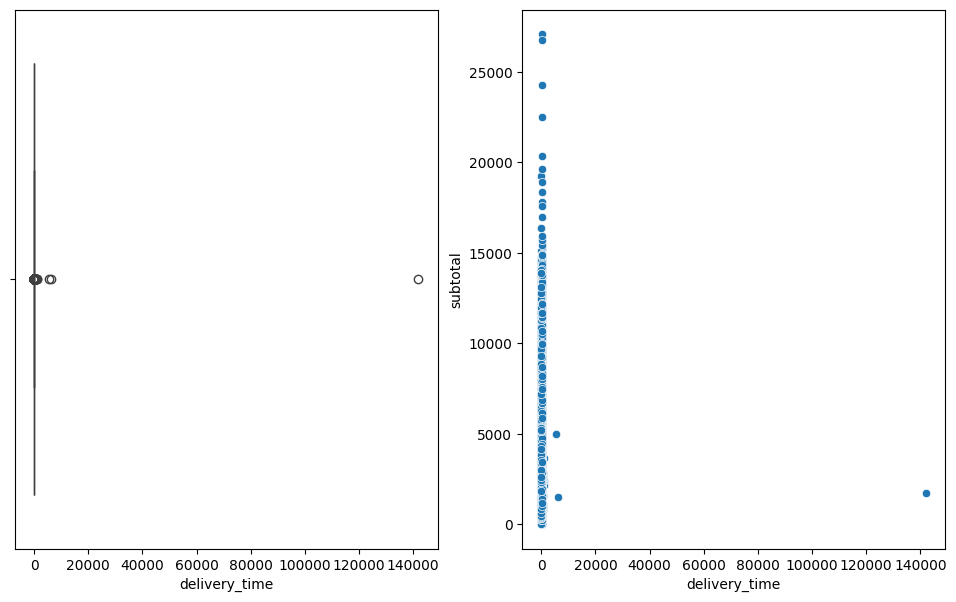

In [ ]:
#Bivariant Analysis
#rows, cols = 1, 2
fig, axs = plt.subplots(1,2, figsize = (12,7))
sns.boxplot(x=df["delivery_time"], data = df,ax=axs[0])
sns.scatterplot(x='delivery_time',y='subtotal',data=df,ax=axs[1])

**Observation**:There are outliers present in the dataset.

In [ ]:
## Removing outliers by interquartile method
Q3 = df['delivery_time'].quantile(0.75)
Q1 = df['delivery_time'].quantile(0.25)
IQR = Q3-Q1
df = df[(df['delivery_time'] > Q1 - 1.5*IQR) & (df['delivery_time'] < Q3 + 1.5*IQR)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191143 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 191143 non-null  float64
 1   store_primary_category    191143 non-null  float64
 2   order_protocol            191143 non-null  float64
 3   total_items               191143 non-null  int64  
 4   subtotal                  191143 non-null  int64  
 5   num_distinct_items        191143 non-null  int64  
 6   min_item_price            191143 non-null  int64  
 7   max_item_price            191143 non-null  int64  
 8   total_onshift_partners    191143 non-null  float64
 9   total_busy_partners       191143 non-null  float64
 10  total_outstanding_orders  191143 non-null  float64
 11  delivery_time             191143 non-null  float64
 12  hour                      191143 non-null  int32  
 13  day                       191143 non-null  int32 

<Axes: xlabel='delivery_time', ylabel='subtotal'>

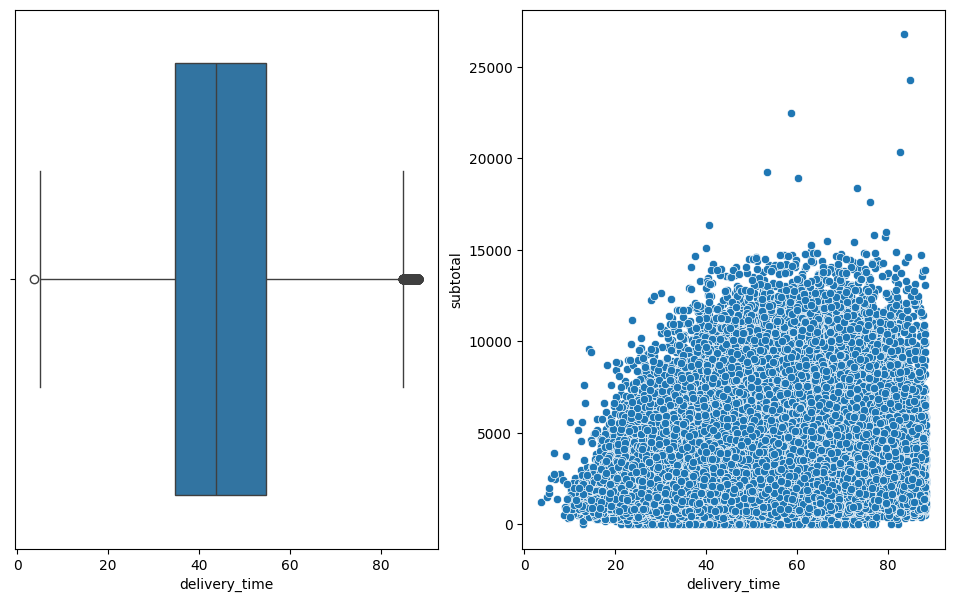

In [ ]:
#Plotting the data again to see if anything has improved

fig, axs = plt.subplots(1,2, figsize = (12,7))
sns.boxplot(x=df["delivery_time"], data = df,ax=axs[0])
sns.scatterplot(x='delivery_time',y='subtotal',data=df,ax=axs[1])

We can see that after removing outliers our data is looking better

##**7. Split the data in train and test**

In [ ]:
# Define your features (X) and target variable (y)
X = df.drop(columns = ["delivery_time"], axis = 1)
y = df["delivery_time"]


In [ ]:
X.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day
0,1.0,47.948328,1.0,4,3441,4,557,1239,33.0,14.0,21.0,22,4
1,2.0,44.546868,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,21,1
2,3.0,47.948328,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,20,3
3,3.0,47.948328,1.0,6,6900,5,600,1800,1.0,1.0,2.0,21,1
4,3.0,47.948328,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,2,6


In [ ]:
# Split the data into a training set (80%) and a testing set (20%)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(152914, 13) (152914,)
(38229, 13) (38229,)


##**8. Creating a baseline model using random forest**

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

##**9. Checking its various metrics like MSE, RMSE, MAE**

In [ ]:
y_hat=regressor.predict(X_test)
mse=mean_squared_error(y_test,y_hat)
rmse=mse**.5
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
mae=mean_absolute_error(y_test,y_hat)
print("Mean Absolute Error : ",mae)
r2_score_RF = r2_score(y_test,y_hat)
print("r2_score : ",r2_score_RF)

Mean Squared Error :  161.6647558698952
Root Mean Squared Error :  12.714745607753827
Mean Absolute Error :  10.07611095253439
r2_score :  0.2575515240749121


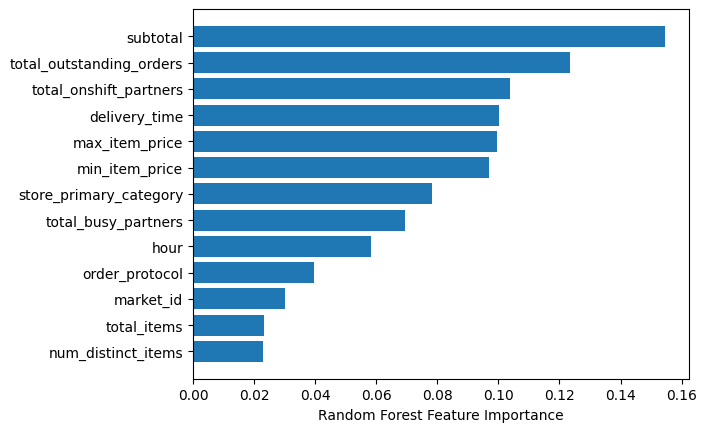

In [ ]:
sorted_idx=regressor.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx],regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

##**10. Scaling the data for neural networks.**

**Feature scaling** involves adjusting all variables or features so that they are on the same scale. This is done to prevent one feature from overpowering others, which could result in it being ignored by the Machine Learning Model. Two main techniques of feature scaling are Normalization and Standardization. We will be using MinMaxScaler



In [ ]:
# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

##**11. Creating a simple neural network**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
## Create a simple neural network model
model = Sequential([
    Dense(64, activation='relu', kernel_initializer='normal', input_shape=(X_train.shape[1],)),
    Dense(516, activation='relu'),
    Dense(1024,activation='relu'),
    Dense(256,activation='relu'),
    Dense(1,activation='linear') # Since it's a regression task, use 1 output neuron
])

##**12. Training the neural network for required amount of epochs**

In [ ]:
##Compile the model with appropriate loss function, optimizer, and metrics

adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])

##Training the neural network for required amount of epochs
history=model.fit(X_train,y_train,epochs=30,batch_size=512,verbose=1,validation_split=0.2)

Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - loss: 1056.6550 - mae: 23.2629 - mse: 1056.6550 - val_loss: 180.8199 - val_mae: 10.6587 - val_mse: 180.8199
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - loss: 180.9793 - mae: 10.7018 - mse: 180.9793 - val_loss: 179.3925 - val_mae: 10.8299 - val_mse: 179.3925
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 179.2734 - mae: 10.6506 - mse: 179.2734 - val_loss: 176.8808 - val_mae: 10.4451 - val_mse: 176.8808
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - loss: 175.6955 - mae: 10.5224 - mse: 175.6955 - val_loss: 172.8187 - val_mae: 10.4988 - val_mse: 172.8187
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 175.2808 - mae: 10.5171 - mse: 175.2808 - val_loss: 173.6677 - val_mae: 10.6232 - val_mse: 173.6677
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - loss: 175.8454 - mae: 10.5248 - mse: 175.8454 - val_loss: 172.9615 - val_mae: 10.3270 - val_mse: 172.9615
Epoch 7/30
239/239 ━━━━━━━

##**13. Plotting the losses and checking the accuracy of the model**

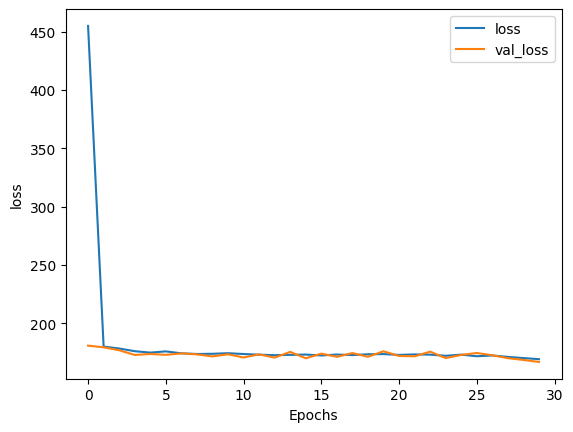

In [ ]:
def plot_history(history,key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key,'val_'+key])
    plt.show()
#plot the history
plot_history(history,'loss')

**Inference:** val loss is mostly below training loss so our model is not overfitting

In [ ]:
z= model.predict(X_test)

1195/1195 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


In [ ]:
mse=mean_squared_error(y_test,z)
rmse=mse**.5
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
mae=mean_absolute_error(y_test,z)
print("Mean Absolute Error : ",mae)
r2_score_RF = r2_score(y_test,z)
print("r2_score : ",r2_score_RF)


Mean Squared Error :  168.0711447705424
Root Mean Squared Error :  12.964225575426493
Mean Absolute Error :  10.344196471263913
r2_score :  0.2281300608136385


##**14. Comparing the results of neural network and random forest**

Here's a comparison of the results between the Random Forest Regressor and the Simple Neural Network model:

**Random Forest Regressor:**
```
Mean Squared Error :  161.6647558698952
Root Mean Squared Error :  12.714745607753827
Mean Absolute Error :  10.07611095253439
r2_score :  0.2575515240749121
```

**Simple Neural Network Model:**

```

Mean Squared Error :  168.0711447705424
Root Mean Squared Error :  12.964225575426493
Mean Absolute Error :  10.344196471263913
r2_score :  0.2281300608136385

```


**Inference :** All the metrics are more or less same for both the model. Although, In this specific scenario, the Random Forest Regressor appears to be negligibly better-performing model.